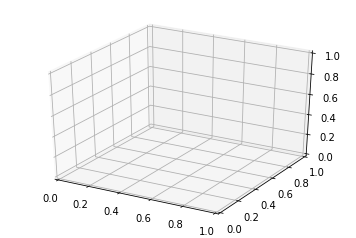

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


from mpl_toolkits.mplot3d import Axes3D

from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')


import distribution2D as d2

tensor([[ 5.6052e-45,  1.5414e-44,  4.3440e-44,  ...,  1.1351e-43,
          4.3440e-44,  1.5414e-44],
        [ 1.5414e-44,  4.3440e-44,  1.1631e-43,  ...,  3.0688e-43,
          1.1631e-43,  4.3440e-44],
        [ 4.3440e-44,  1.1631e-43,  3.1109e-43,  ...,  8.2396e-43,
          3.1109e-43,  1.1631e-43],
        ...,
        [ 1.1351e-43,  3.0688e-43,  8.2396e-43,  ...,  2.1832e-42,
          8.2396e-43,  3.0688e-43],
        [ 4.3440e-44,  1.1631e-43,  3.1109e-43,  ...,  8.2396e-43,
          3.1109e-43,  1.1631e-43],
        [ 1.5414e-44,  4.3440e-44,  1.1631e-43,  ...,  3.0688e-43,
          1.1631e-43,  4.3440e-44]])


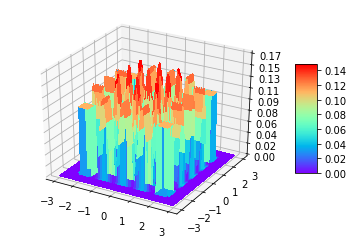

<Figure size 432x288 with 0 Axes>

In [3]:
#True distribution

X = np.arange(-3, 3, 0.02)
Y = np.arange(-3, 3, 0.02)
X, Y = np.meshgrid(X, Y)

import torch

x = torch.Tensor(X)
y = torch.Tensor(Y)

plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()


points = torch.zeros(int(6/0.02)**2, 2)

for i in range(300):
    for j in range(300):
        points[300*i + j, 0] = x[i, j]
        points[300*i + j, 1] = y[i, j]

        
z = d2.columnVals(points).view(300, 300)
Z = z.numpy()

print(z)
surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(Z) + 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [1]:
#Deep Model (maxk likelihood)

from realModelDeep import *

In [17]:
model = torch.load('deepWeights/epoch239100')

In [18]:
_, lz = model(points.cuda())

In [19]:
Z = torch.exp(lz).cpu().view(60, 60).detach().numpy()

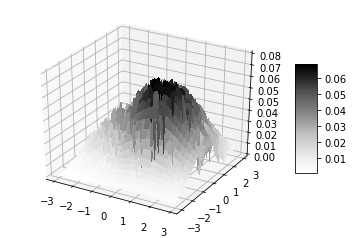

<Figure size 432x288 with 0 Axes>

In [20]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.Greys,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(Z) + 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [4]:
#shallow model

from realModel import *

In [9]:
model = torch.load('shallowWeights/epoch1008800')

In [10]:
_, lz = model(points.cuda())

In [11]:
Z = torch.exp(lz).cpu().view(60, 60).detach().numpy()

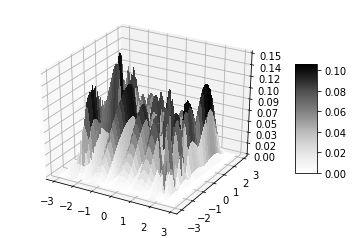

<Figure size 432x288 with 0 Axes>

In [12]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.Greys,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(Z) + 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

/nfs01/shared_software/anaconda3/envs/artem/lib/python3.5/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'realModelDeepAdv.flowGAN' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


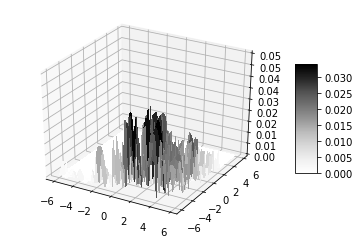

<Figure size 432x288 with 0 Axes>

In [12]:
#Deep Model (adversarial likelihood)

from realModelDeepAdv import *

X = np.arange(-6, 6, 0.2)
Y = np.arange(-6, 6, 0.2)
X, Y = np.meshgrid(X, Y)



model = torch.load('deepWeightsPretrained/epoch1500')

_, lz = model(points.cuda())

Z = torch.exp(lz).cpu().view(60, 60).detach().numpy()


plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.Greys,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(Z) + 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [21]:
#shallow model

from realAdversarialModel import *

In [22]:
model = torch.load('shallowAdversarialWeights/epoch159700')

/nfs01/shared_software/anaconda3/envs/artem/lib/python3.5/site-packages/torch/serialization.py:367: SourceChangeWarning: source code of class 'nln.nLayer' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [23]:
_, lz = model(points.cuda())

AttributeError: 'nLayer' object has no attribute 'B'

In [15]:
Z = torch.exp(lz).cpu().view(120, 120).detach().numpy()

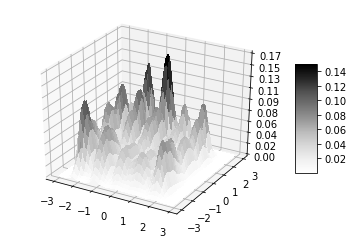

<Figure size 432x288 with 0 Axes>

In [16]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.Greys,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(Z) + 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [3]:
from realModel import *

In [5]:
model = torch.load('newNLN/epoch9900')

In [17]:
_, lz = model(points.cuda())

In [19]:
Z = torch.exp(lz).cpu().view(120, 120).detach().numpy()

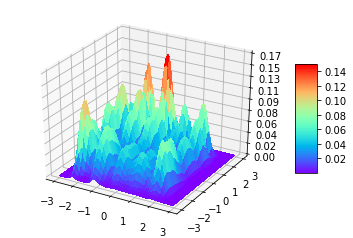

<Figure size 432x288 with 0 Axes>

In [24]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, np.max(Z) + 0.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [17]:
from realModel import *

In [18]:
model = torch.load('newNLN/epoch1000')

In [19]:
_, lz = model(points.cuda())

/home/atb86/selfGANdemo/nln.py:72: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  B1 = self.soft(self.B - 1e-2) + 1e-2
/home/atb86/selfGANdemo/nln.py:73: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  B  = 10 - self.soft(10 - B1)
/home/atb86/selfGANdemo/nln.py:84: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  B1 = self.soft(self.B - 1e-2) + 1e-2
/home/atb86/selfGANdemo/nln.py:85: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  B  = 10 - self.soft(10 - B1)


In [20]:
Z = torch.exp(lz).cpu().view(240, 240).detach().numpy()

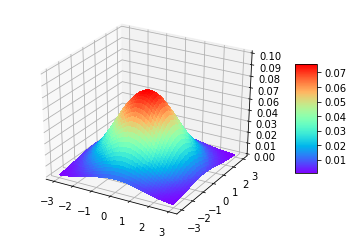

<Figure size 432x288 with 0 Axes>

In [22]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.1)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [6]:
from glowModel import *

In [12]:
#Shallow; 2 layers, hidden=64
model = torch.load('glowData/epoch600')

In [13]:
_, lz = model(points.cuda())

In [14]:
Z = torch.exp(lz).cpu().view(240, 240).detach().numpy()
print(Z)

[[1.4619168e-24 3.0807934e-22 1.5240756e-20 ...           nan
            nan           nan]
 [2.6940101e-24 5.2022638e-22 2.7078840e-20 ...           nan
            nan           nan]
 [4.3861080e-24 6.4762981e-22 3.3305636e-20 ...           nan
            nan           nan]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


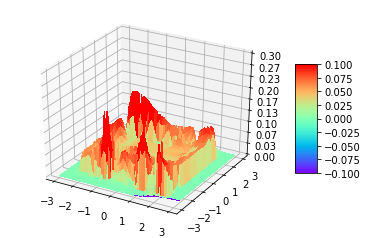

<Figure size 432x288 with 0 Axes>

In [16]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.3)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [4]:
from glowModel import *

In [5]:
#6 layers, hidden=128
model = torch.load('glowData/epoch8700')

In [59]:
_, lz = model.cpu()(points)

In [60]:
Z = torch.exp(lz).view(240, 240).detach().numpy()

RuntimeError: invalid argument 2: size '[240 x 240]' is invalid for input with 90000 elements at /pytorch/aten/src/TH/THStorage.c:41

/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


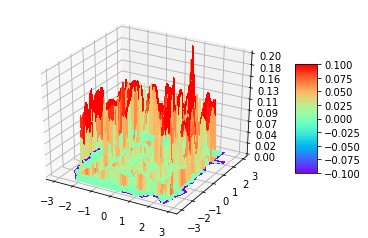

<Figure size 432x288 with 0 Axes>

In [9]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))


fig.colorbar(surf, shrink=0.5, aspect=5)

fig

#Starting to take shape!
#I'll run it again a little longer.

In [69]:
from glowModel import *
#12 layers, 128
model = torch.load('glowData/epoch9200')

In [70]:
_, lz = model.cpu()(points)
Z = torch.exp(lz).view(300, 300).detach().numpy()

/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


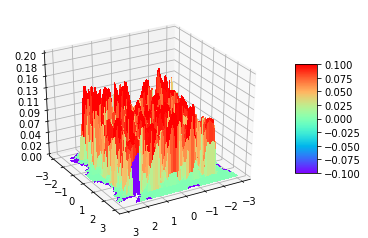

<Figure size 432x288 with 0 Axes>

In [71]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(30, 60)
fig.colorbar(surf, shrink=0.5, aspect=5)

fig

#Starting to take shape!
#I'll run it again a little longer.

In [73]:
U = model.cuda().sample(6000)
U2 = d2.Column(6000)

In [74]:
x = U[:, 0].cpu().detach().numpy()
y = U[:, 1].cpu().detach().numpy()

x2 = U2[:, 0].cpu().detach().numpy()
y2 = U2[:, 1].cpu().detach().numpy()

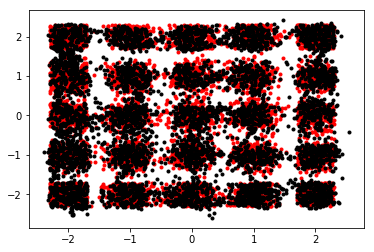

In [75]:
plt.clf()
plt.plot(x2, y2, 'r.')
plt.plot(x, y, 'k.')
plt.show()

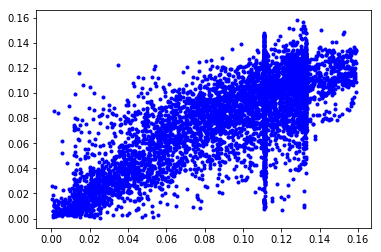

In [76]:
_, l1 = model(U2)
m = torch.exp(l1).cpu().detach().numpy()
p = d2.columnVals(U2).cpu().detach().numpy()

plt.clf()
plt.plot(p, m, 'b.')
plt.show()

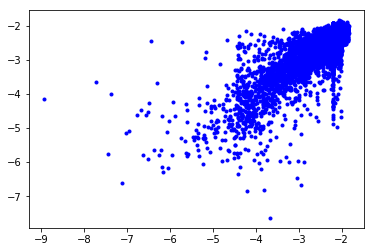

In [77]:
lm = l1.cpu().detach().numpy()
lp = torch.log(d2.columnVals(U2)).cpu().detach().numpy()

plt.clf()
plt.plot(lp, lm, 'b.')
plt.show()

In [10]:
from glowModel import *
#1 layers, 1024
model = torch.load('glowData1024/epoch12100')

In [11]:
_, lz = model.cpu()(points)
Z = torch.exp(lz).view(300, 300).detach().numpy()

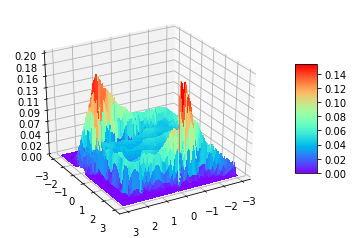

<Figure size 432x288 with 0 Axes>

In [12]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(30, 60)
fig.colorbar(surf, shrink=0.5, aspect=5)

fig


In [8]:
math.log(20)

2.995732273553991

In [9]:
np.sum(lm<-3)

NameError: name 'lm' is not defined

In [13]:
from glowModel import *
#12 layers, 512, dropout
model = torch.load('glowDropout/epoch2100')

In [14]:
model.train()
_, lz = model.cpu()(points)
Z = torch.exp(lz).view(300, 300).detach().numpy()

/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


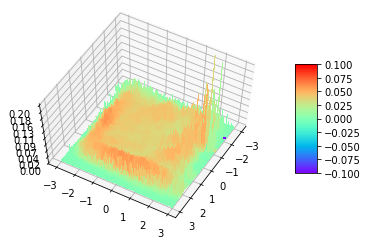

<Figure size 432x288 with 0 Axes>

In [17]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(60, 30)
fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [7]:
from glowModel import *
#12 layers, 128, dropout
model = torch.load('glowDropout128/epoch3200')

In [8]:
_, lz = model.cpu()(points)
Z = torch.exp(lz).view(300, 300).detach().numpy()

/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


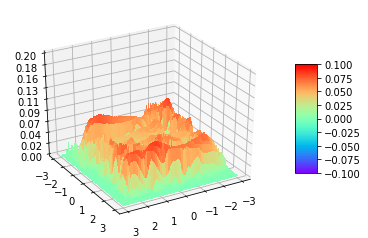

<Figure size 432x288 with 0 Axes>

In [9]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(30, 60)
fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [10]:
U = model.cuda().sample(6000)
U2 = d2.Column(6000)

In [11]:
x = U[:, 0].cpu().detach().numpy()
y = U[:, 1].cpu().detach().numpy()

x2 = U2[:, 0].cpu().detach().numpy()
y2 = U2[:, 1].cpu().detach().numpy()

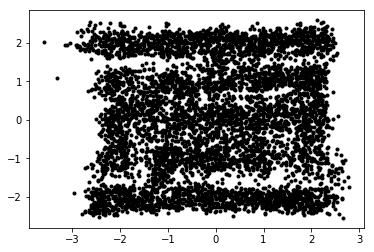

In [12]:
plt.clf()
#plt.plot(x2, y2, 'r.')
plt.plot(x, y, 'k.')
plt.show()

In [13]:
from glowModel import *
#12 layers, 128, dropout
model = torch.load('glowDropout128/epoch10000')

In [14]:
_, lz = model.cpu()(points)
Z = torch.exp(lz).view(300, 300).detach().numpy()

/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


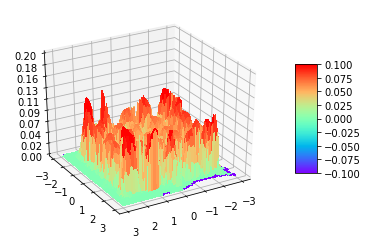

<Figure size 432x288 with 0 Axes>

In [15]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(30, 60)
fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [16]:
U = model.cuda().sample(6000)
U2 = d2.Column(6000)

x = U[:, 0].cpu().detach().numpy()
y = U[:, 1].cpu().detach().numpy()

x2 = U2[:, 0].cpu().detach().numpy()
y2 = U2[:, 1].cpu().detach().numpy()

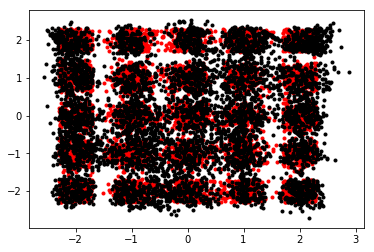

In [17]:
plt.clf()
plt.plot(x2, y2, 'r.')
plt.plot(x, y, 'k.')
plt.show()

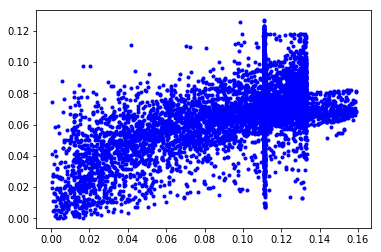

In [18]:
_, l1 = model(U2)
m = torch.exp(l1).cpu().detach().numpy()
p = d2.columnVals(U2).cpu().detach().numpy()

plt.clf()
plt.plot(p, m, 'b.')
plt.show()

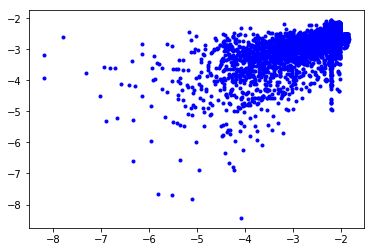

In [19]:
lm = l1.cpu().detach().numpy()
lp = torch.log(d2.columnVals(U2)).cpu().detach().numpy()

plt.clf()
plt.plot(lp, lm, 'b.')
plt.show()

In [24]:
U3 = torch.zeros(6000, 2)
U3.uniform_(-2.75, 2.75).cuda()

tensor([[-2.3273, -2.7100],
        [ 2.6515, -1.0819],
        [-1.1897, -1.4743],
        ...,
        [-0.9043, -2.6477],
        [ 1.4891, -0.6151],
        [ 2.5326, -2.1080]], device='cuda:0')

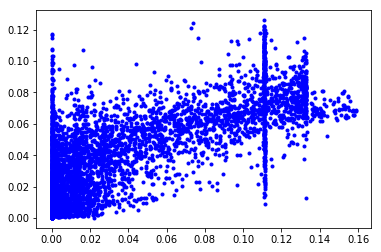

In [26]:
_, l1 = model.cpu()(U3)
m = torch.exp(l1).cpu().detach().numpy()
p = d2.columnVals(U3).cpu().detach().numpy()

plt.clf()
plt.plot(p, m, 'b.')
plt.show()

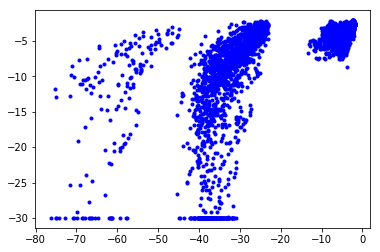

In [29]:
lm = l1.clamp_(min=-30).cpu().detach().numpy()
lp = torch.log(d2.columnVals(U3)).cpu().detach().numpy()

plt.clf()
plt.plot(lp, lm, 'b.')
plt.show()

In [33]:
num = 0
for i in range(6000):
    if lp[i] < -10 and lm[i] > -10:
        num += 1

print("False positive rate = " + str(num/float(6000)))

False positive rate = 0.1985


In [24]:
from glowModel import *
#6 layers, 64, adversarial
model = torch.load('glowAdvBatchnorm/epoch16100')

In [31]:
_, lz = model.cpu()(points)
Z = torch.exp(lz.clamp(min=-20, max=20)).view(300, 300).detach().numpy()

/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


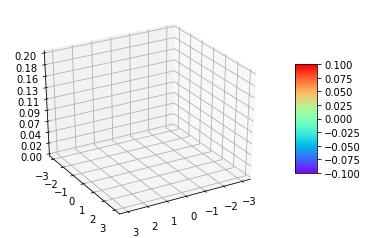

<Figure size 432x288 with 0 Axes>

In [32]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(30, 60)
fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [33]:
U = model.cuda().sample(6000)
U2 = d2.Column(6000)

x = U[:, 0].cpu().detach().numpy()
y = U[:, 1].cpu().detach().numpy()

x2 = U2[:, 0].cpu().detach().numpy()
y2 = U2[:, 1].cpu().detach().numpy()

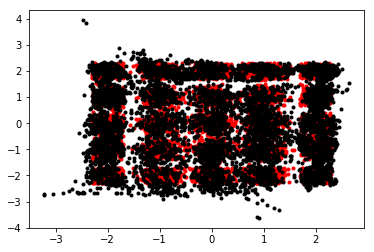

In [34]:
plt.clf()
plt.plot(x2, y2, 'r.')
plt.plot(x, y, 'k.')
plt.show()

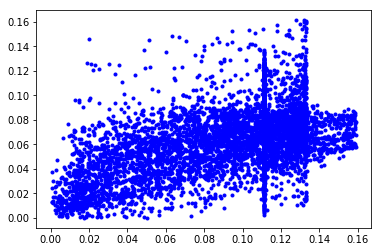

In [35]:
_, l1 = model(U2)
m = torch.exp(l1).cpu().detach().numpy()
p = d2.columnVals(U2).cpu().detach().numpy()

plt.clf()
plt.plot(p, m, 'b.')
plt.show()

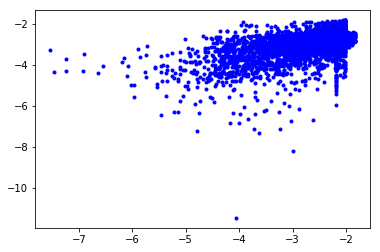

In [36]:
lm = l1.cpu().detach().numpy()
lp = torch.log(d2.columnVals(U2)).cpu().detach().numpy()

plt.clf()
plt.plot(lp, lm, 'b.')
plt.show()

In [37]:
U3 = torch.zeros(6000, 2)
U3.uniform_(-2.75, 2.75).cuda()

tensor([[ 2.5779e+00,  1.5016e+00],
        [-6.9548e-01,  1.5128e+00],
        [-2.6917e+00, -1.2020e+00],
        ...,
        [-1.1585e+00,  2.0438e-01],
        [-8.1905e-01,  1.7044e+00],
        [ 5.4299e-01,  1.6927e+00]], device='cuda:0')

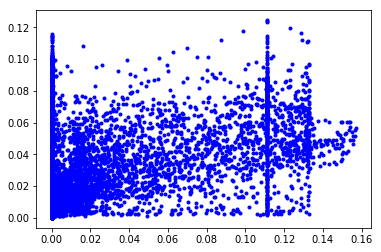

In [38]:
_, l1 = model.cpu()(U3)
m = torch.exp(l1).cpu().detach().numpy()
p = d2.columnVals(U3).cpu().detach().numpy()

plt.clf()
plt.plot(p, m, 'b.')
plt.show()

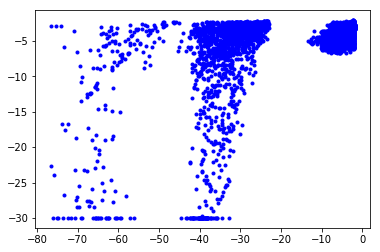

In [39]:
lm = l1.clamp_(min=-30).cpu().detach().numpy()
lp = torch.log(d2.columnVals(U3)).cpu().detach().numpy()

plt.clf()
plt.plot(lp, lm, 'b.')
plt.show()

In [45]:
num = 0
for i in range(6000):
    if lp[i] < -20 and lm[i] > -20:
        num += 1

print("False positive rate = " + str(num/float(6000)))

False positive rate = 0.2708333333333333


In [4]:
from glowModelOrig import *

In [5]:
#12 layers, 128, old school
model = torch.load('glowOrig/epoch5500')

In [6]:
_, lz = model.cpu()(points)
Z = torch.exp(lz).view(300, 300).detach().numpy()

/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/home/atb86/.local/lib/python3.5/site-packages/matplotlib/colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


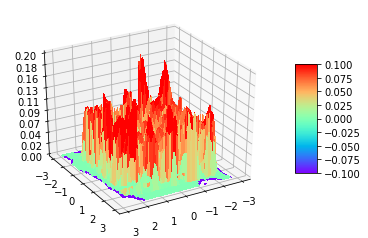

<Figure size 432x288 with 0 Axes>

In [7]:
plt.clf()
fig.clear()
ax = fig.gca(projection='3d')
ax.clear()

surf = ax.plot_surface(X, Y, Z, cmap=cm.rainbow,
                       linewidth=0, antialiased=False)
ax.set_zlim(0, 0.2)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

ax.view_init(30, 60)
fig.colorbar(surf, shrink=0.5, aspect=5)

fig

In [75]:
U3 = torch.zeros(6000, 2)
U3.uniform_(-2.75, 2.75).cuda()

tensor([[-0.5232, -1.2685],
        [-0.4391, -2.5683],
        [-1.7018, -2.5185],
        ...,
        [ 1.7259, -0.9271],
        [-0.7096, -0.3213],
        [ 1.1128,  1.4160]], device='cuda:0')

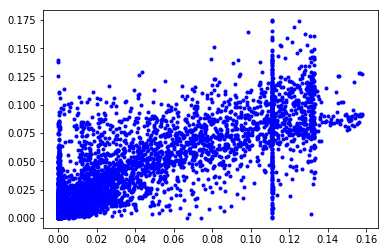

In [76]:
_, l1 = model.cpu()(U3)
m = torch.exp(l1).cpu().detach().numpy()
p = d2.columnVals(U3).cpu().detach().numpy()

plt.clf()
plt.plot(p, m, 'b.')
plt.show()

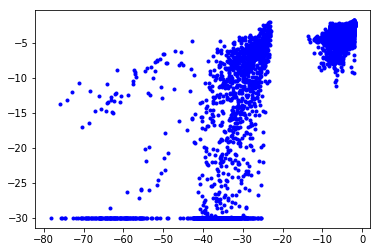

In [77]:
lm = l1.clamp_(min=-30).cpu().detach().numpy()
lp = torch.log(d2.columnVals(U3)).cpu().detach().numpy()

plt.clf()
plt.plot(lp, lm, 'b.')
plt.show()

In [78]:
num = 0
for i in range(6000):
    if lp[i] < -10 and lm[i] > -10:
        num += 1

print("False positive rate = " + str(num/float(6000)))

False positive rate = 0.10833333333333334


In [8]:
U = model.cuda().sample(6000)
U2 = d2.Column(6000)

x = U[:, 0].cpu().detach().numpy()
y = U[:, 1].cpu().detach().numpy()

x2 = U2[:, 0].cpu().detach().numpy()
y2 = U2[:, 1].cpu().detach().numpy()

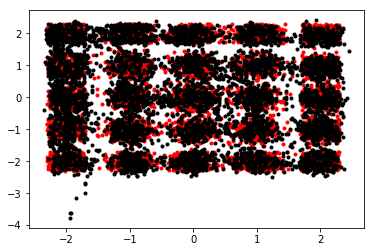

In [9]:
plt.clf()
plt.plot(x2, y2, 'r.')
plt.plot(x, y, 'k.')
plt.show()

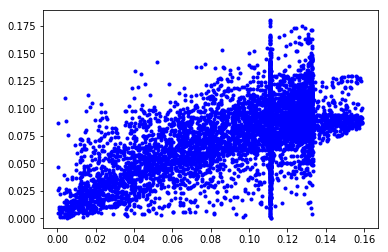

In [10]:
_, l1 = model(U2)
m = torch.exp(l1).cpu().detach().numpy()
p = d2.columnVals(U2).cpu().detach().numpy()

plt.clf()
plt.plot(p, m, 'b.')
plt.show()

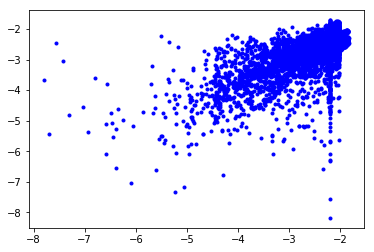

In [11]:
lm = l1.cpu().detach().numpy()
lp = torch.log(d2.columnVals(U2)).cpu().detach().numpy()

plt.clf()
plt.plot(lp, lm, 'b.')
plt.show()